<a href="https://colab.research.google.com/github/ssobranding/Portfolio/blob/main/4_Marketing_Strategy_by_Customer_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.ticker as ticker
import seaborn as sns

In [ ]:
customer_df = pd.read_csv('customer_data.csv')

# 1. Data Preparation

In [ ]:
# Data check
customer_df.shape
pd.set_option('display.max_columns', None)
customer_df.head()
customer_df.info()
customer_df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     2240 non-null   int64  
 1   signup_ym              2240 non-null   object 
 2   birth_year             2240 non-null   int64  
 3   annual_income          2216 non-null   float64
 4   marital_status         2240 non-null   object 
 5   children               2240 non-null   int64  
 6   recency                2240 non-null   int64  
 7   amount_alcohol         2240 non-null   int64  
 8   amount_fruit           2240 non-null   int64  
 9   amount_meat            2240 non-null   int64  
 10  amount_fish            2240 non-null   int64  
 11  amount_snack           2240 non-null   int64  
 12  amount_general         2240 non-null   int64  
 13  num_purchase_web       2240 non-null   int64  
 14  num_purchase_store     2240 non-null   int64  
 15  num_

,ID,signup_ym,birth_year,annual_income,marital_status,children,recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,amount_snack,amount_general,num_purchase_web,num_purchase_store,num_purchase_discount,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,revenue
count,2240.000000,2240,2240.000000,2.216000e+03,2240,2240.000000,2240.000000,2.240000e+03,2240.000000,2.240000e+03,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0
unique,NaN,24,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2021-12,NaN,NaN,Married,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,111,NaN,NaN,1444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5592.159821,NaN,1976.805804,6.792143e+07,NaN,0.950446,49.109375,3.951164e+05,34192.901786,2.170350e+05,48783.080357,35181.830357,57228.437500,4.084821,5.790179,2.325000,0.064286,0.013393,0.072768,0.074554,0.072768,0.149107,11.0
std,3246.662198,NaN,11.984069,3.272500e+07,NaN,0.751803,28.962453,4.375766e+05,51705.463894,2.934300e+05,71017.673224,53664.648034,67817.670589,2.778714,3.250958,1.932238,0.245316,0.114976,0.259813,0.262728,0.259813,0.356274,0.0
min,0.000000,NaN,1901.000000,2.249000e+06,NaN,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.0
25%,2828.250000,NaN,1967.000000,4.589390e+07,NaN,0.000000,24.000000,3.087500e+04,1300.000000,2.080000e+04,3900.000000,1300.000000,11700.000000,2.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.0
50%,5458.500000,NaN,1978.000000,6.679595e+07,NaN,1.000000,49.000000,2.255500e+05,10400.000000,8.710000e+04,15600.000000,10400.000000,31200.000000,4.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.0
75%,8427.750000,NaN,1985.000000,8.907860e+07,NaN,1.000000,74.000000,6.555250e+05,42900.000000,3.016000e+05,65000.000000,42900.000000,72800.000000,6.000000,8.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.0


In [ ]:
# Object column check
columns_object_dtype = customer_df.columns[customer_df.dtypes == 'object']
columns_object_dtype

Index(['signup_ym', 'marital_status'], dtype='object')

In [ ]:
# Identify unique values
for col in columns_object_dtype:
    unique_values = sorted(customer_df[col].unique())
    print(f'{col}: {len(unique_values)}')
    print(unique_values, '\n')

signup_ym: 24
['2020-10', '2020-11', '2020-12', '2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06', '2021-07', '2021-08', '2021-09', '2021-10', '2021-11', '2021-12', '2022-01', '2022-02', '2022-03', '2022-04', '2022-05', '2022-06', '2022-07', '2022-08', '2022-09'] 

marital_status: 4
['Divorced', 'Married', 'Single', 'Widowed'] 



In [ ]:
# Check NA value
customer_df.isna().sum()

,0
ID,0
signup_ym,0
birth_year,0
annual_income,24
marital_status,0
children,0
recency,0
amount_alcohol,0
amount_fruit,0
amount_meat,0


In [ ]:
# Delete NA value
customer_df = customer_df.dropna()
customer_df.isna().sum()

,0
ID,0
signup_ym,0
birth_year,0
annual_income,0
marital_status,0
children,0
recency,0
amount_alcohol,0
amount_fruit,0
amount_meat,0


In [ ]:
# Calculate age
customer_df['birth_year'] = 2023 - customer_df['birth_year']

customer_df = customer_df.rename(columns={'birth_year': 'age'})
customer_df.head()

,ID,signup_ym,age,annual_income,marital_status,children,recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,amount_snack,amount_general,num_purchase_web,num_purchase_store,num_purchase_discount,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,revenue
0,5524,2020-12,58,75579400.0,Single,0,58,825500,114400,709800,223600,114400,114400,8,4,3,0,0,0,0,0,1,11
1,2174,2022-06,61,60247200.0,Single,2,38,14300,1300,7800,2600,1300,7800,1,2,2,0,0,0,0,0,0,11
2,4141,2021-11,50,93096900.0,Married,0,26,553800,63700,165100,144300,27300,54600,8,10,1,0,0,0,0,0,0,11
3,6182,2022-05,31,34639800.0,Married,1,26,14300,5200,26000,13000,3900,6500,2,4,2,0,0,0,0,0,0,11
4,5324,2022-04,34,75780900.0,Married,1,94,224900,55900,153400,59800,35100,19500,5,6,5,0,0,0,0,0,0,11


In [ ]:
# Calculate total amount
data_amount_total = (
    customer_df['amount_alcohol']
    + customer_df['amount_fruit']
    + customer_df['amount_meat']
    + customer_df['amount_fish']
    + customer_df['amount_snack']
    + customer_df['amount_general']
)

index_amount_general = customer_df.columns.get_loc('amount_general')

customer_df.insert(
    loc=index_amount_general + 1,
    column='amount_total',
    value=data_amount_total,
)
customer_df.head()

,ID,signup_ym,age,annual_income,marital_status,children,recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,amount_snack,amount_general,amount_total,num_purchase_web,num_purchase_store,num_purchase_discount,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,revenue
0,5524,2020-12,58,75579400.0,Single,0,58,825500,114400,709800,223600,114400,114400,2102100,8,4,3,0,0,0,0,0,1,11
1,2174,2022-06,61,60247200.0,Single,2,38,14300,1300,7800,2600,1300,7800,35100,1,2,2,0,0,0,0,0,0,11
2,4141,2021-11,50,93096900.0,Married,0,26,553800,63700,165100,144300,27300,54600,1008800,8,10,1,0,0,0,0,0,0,11
3,6182,2022-05,31,34639800.0,Married,1,26,14300,5200,26000,13000,3900,6500,68900,2,4,2,0,0,0,0,0,0,11
4,5324,2022-04,34,75780900.0,Married,1,94,224900,55900,153400,59800,35100,19500,548600,5,6,5,0,0,0,0,0,0,11


In [ ]:
# Calculate total number of purchase

num_purchase_total = (
    customer_df['num_purchase_web']
    + customer_df['num_purchase_store']
    + customer_df['num_purchase_discount']
)

index_num_purchase_discount = customer_df.columns.get_loc('num_purchase_discount')
customer_df.insert(
    loc=index_num_purchase_discount + 1,
    column='num_purchase_total',
    value=num_purchase_total,
)
customer_df.head()

,ID,signup_ym,age,annual_income,marital_status,children,recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,amount_snack,amount_general,amount_total,num_purchase_web,num_purchase_store,num_purchase_discount,num_purchase_total,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,revenue
0,5524,2020-12,58,75579400.0,Single,0,58,825500,114400,709800,223600,114400,114400,2102100,8,4,3,15,0,0,0,0,0,1,11
1,2174,2022-06,61,60247200.0,Single,2,38,14300,1300,7800,2600,1300,7800,35100,1,2,2,5,0,0,0,0,0,0,11
2,4141,2021-11,50,93096900.0,Married,0,26,553800,63700,165100,144300,27300,54600,1008800,8,10,1,19,0,0,0,0,0,0,11
3,6182,2022-05,31,34639800.0,Married,1,26,14300,5200,26000,13000,3900,6500,68900,2,4,2,8,0,0,0,0,0,0,11
4,5324,2022-04,34,75780900.0,Married,1,94,224900,55900,153400,59800,35100,19500,548600,5,6,5,16,0,0,0,0,0,0,11


In [ ]:
# Delete useless column
customer_df = customer_df.drop(columns=['revenue'])
customer_df.head()

,ID,signup_ym,age,annual_income,marital_status,children,recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,amount_snack,amount_general,amount_total,num_purchase_web,num_purchase_store,num_purchase_discount,num_purchase_total,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6
0,5524,2020-12,58,75579400.0,Single,0,58,825500,114400,709800,223600,114400,114400,2102100,8,4,3,15,0,0,0,0,0,1
1,2174,2022-06,61,60247200.0,Single,2,38,14300,1300,7800,2600,1300,7800,35100,1,2,2,5,0,0,0,0,0,0
2,4141,2021-11,50,93096900.0,Married,0,26,553800,63700,165100,144300,27300,54600,1008800,8,10,1,19,0,0,0,0,0,0
3,6182,2022-05,31,34639800.0,Married,1,26,14300,5200,26000,13000,3900,6500,68900,2,4,2,8,0,0,0,0,0,0
4,5324,2022-04,34,75780900.0,Married,1,94,224900,55900,153400,59800,35100,19500,548600,5,6,5,16,0,0,0,0,0,0


# 2. Demographic Customer Information Analysis

## 2.1. Age Distribution




Text(0, 0.5, 'Count')

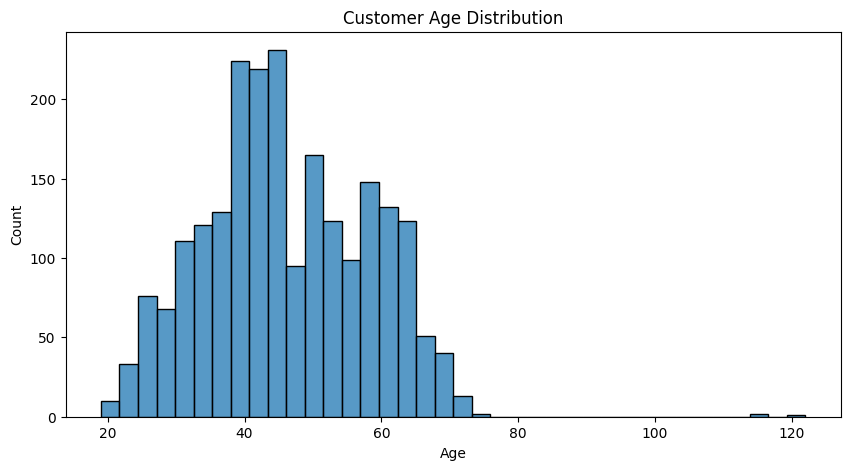

In [ ]:
# Age distribution plot
plt.rcParams['figure.figsize'] = (10, 5)
sns.histplot(data=customer_df['age'])
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')


Text(0, 0.5, 'Count')

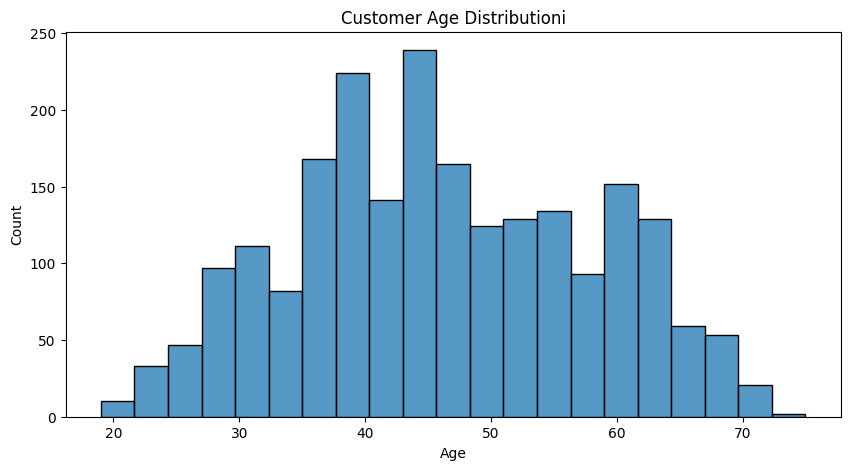

In [ ]:
# Delete age outliers
customer_df.sort_values(by='age', ascending=False)
customer_df = customer_df[customer_df['age'] < 100]

sns.histplot(data=customer_df['age'])
plt.title('Customer Age Distributioni')
plt.xlabel('Age')
plt.ylabel('Count')


In [ ]:
# Transition age data to categorical data
age_bins = list(range(10, 81, 10))
age_labels = [f'{x}s' for x in age_bins[:-1]]
age_group = pd.cut(x=customer_df['age'], bins=age_bins, labels=age_labels, right=False)

customer_df.insert(
    loc=customer_df.columns.get_loc('age') + 1,
    column='age_group',
    value=age_group,
)

customer_df['age_group'].value_counts()

,count
age_group,
40s,678
30s,502
50s,485
60s,338
20s,185
70s,23
10s,2


In [ ]:
# Arrage categories
age_group_replace_dict = {
    '10s': '20s or below',
    '20s': '20s or below',
    '60s': '60s and above',
    '70s': '60s and above',
}
customer_df['age_group'] = customer_df['age_group'].replace(age_group_replace_dict)

customer_df['age_group'].value_counts()

/tmp/ipython-input-1018894663.py:8: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  customer_df['age_group'] = customer_df['age_group'].replace(age_group_replace_dict)


,count
age_group,
40s,678
30s,502
50s,485
60s and above,361
20s or below,187


## 2.2. Annual Income Distribution

Text(0, 0.5, 'Count')

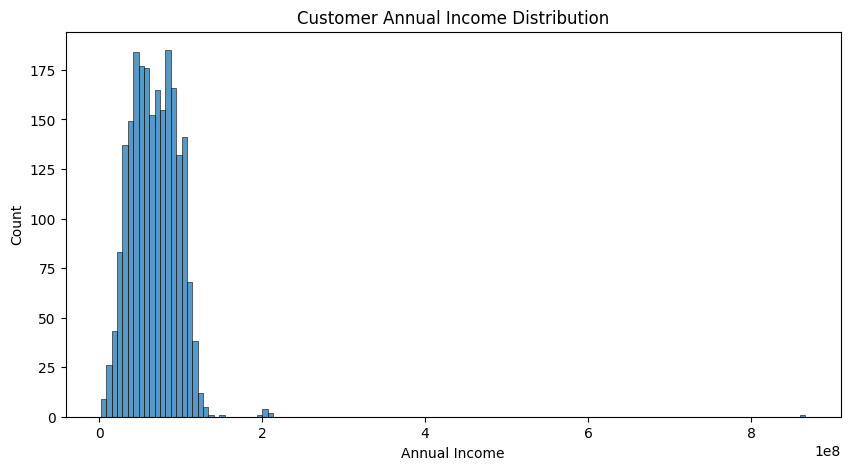

In [ ]:
# Annual income distribution plot
sns.histplot(data=customer_df['annual_income'])
plt.title('Customer Annual Income Distribution')
plt.xlabel('Annual Income')
plt.ylabel('Count')

<Axes: xlabel='annual_income'>

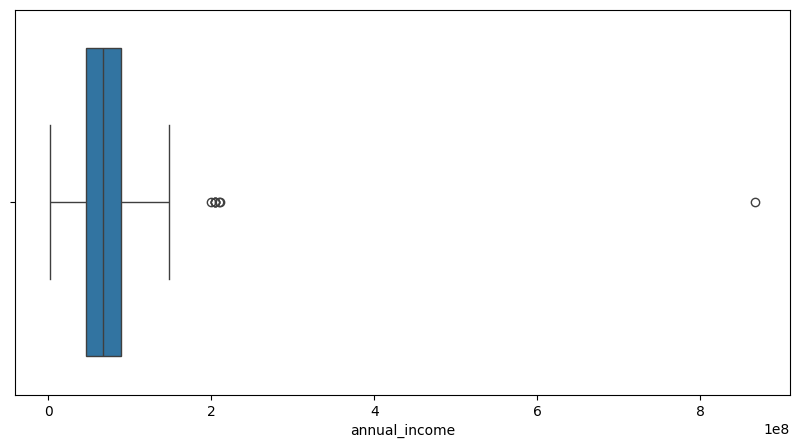

In [ ]:
# Annual income box plot
sns.boxplot(data=customer_df, x='annual_income')

<Axes: xlabel='annual_income'>

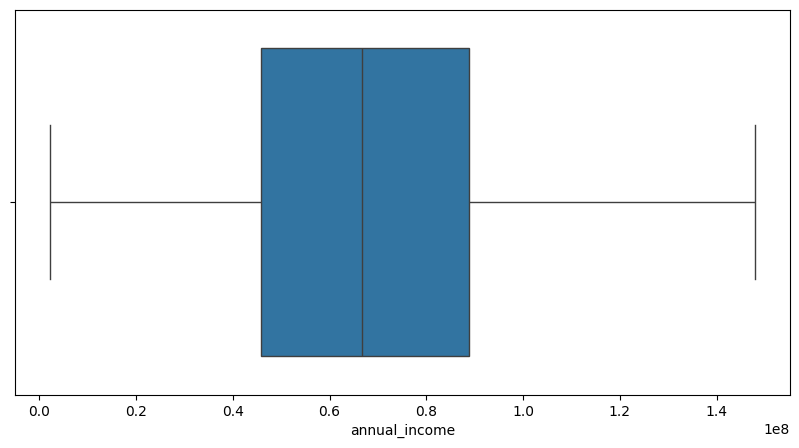

In [ ]:
# Delete outliers
income = customer_df['annual_income']
q1 = income.quantile(0.25)
q3 = income.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

normal_condition = (lower_bound <= income) & (income <= upper_bound)
customer_df = customer_df[normal_condition]

sns.boxplot(data=customer_df, x='annual_income')

# 3. RFM Customer Segment Classification

## 3.1. Rating Recency, Frequency, Monetary

In [ ]:
# Divide into three grades
num_grades = 3
grade_labels = list(range(1, num_grades + 1))

In [ ]:
# Rating Recency
recency_grade = pd.qcut(x=customer_df['recency'], q=num_grades, labels=grade_labels[::-1])
customer_df['recency_grade'] = recency_grade
customer_df['recency_grade'].value_counts()

,count
recency_grade,
3,752
1,730
2,723


/tmp/ipython-input-3022402083.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupby_recency_grade = customer_df.groupby('recency_grade').sum(numeric_only=True).reset_index()


<Axes: title={'center': 'Sales Contribution by Recency Grade'}>

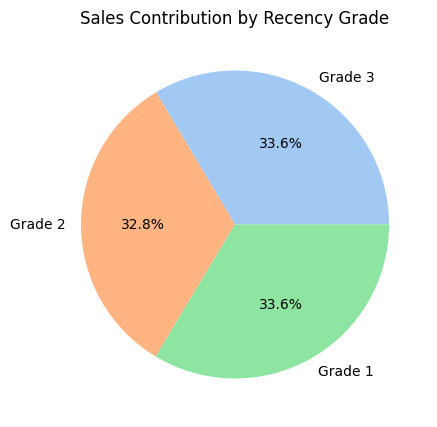

In [ ]:
# Recency pie chart
groupby_recency_grade = customer_df.groupby('recency_grade').sum(numeric_only=True).reset_index()

colors = sns.color_palette("pastel", 6)
groupby_recency_grade['amount_total'].plot(
    kind='pie',
    autopct='%.1f%%',
    labels=[f'Grade {x}' for x in grade_labels[::-1]],
    title='Sales Contribution by Recency Grade',
    ylabel='',
    colors=colors
)



In [ ]:
# Rating Frequency
customer_df['frequency_grade'] = pd.qcut(
    x=customer_df['num_purchase_total'], q=num_grades, labels=grade_labels
)
customer_df['frequency_grade'].value_counts()

,count
frequency_grade,
1,851
2,679
3,675


/tmp/ipython-input-1313337024.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupby_frequency_grade = customer_df.groupby('frequency_grade').sum(numeric_only=True).reset_index()


<Axes: title={'center': 'Sales Contribution by Frequency Grade'}>

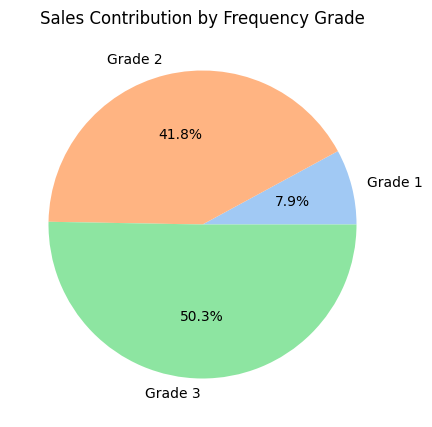

In [ ]:
# Frequency pie chart
groupby_frequency_grade = customer_df.groupby('frequency_grade').sum(numeric_only=True).reset_index()
groupby_frequency_grade['amount_total'].plot(
    kind='pie',
    autopct='%.1f%%',
    labels=[f'Grade {x}' for x in grade_labels],
    title='Sales Contribution by Frequency Grade',
    ylabel='',
    colors=colors
)

In [ ]:
# Rating Monetary
customer_df['monetary_grade'] = pd.qcut(
    x=customer_df['amount_total'], q=num_grades, labels=grade_labels
)
customer_df['monetary_grade'].value_counts()

,count
monetary_grade,
1,735
2,735
3,735


/tmp/ipython-input-509847457.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupby_monetary_grade = customer_df.groupby('monetary_grade').sum(numeric_only=True).reset_index()


<Axes: title={'center': 'Sales Contribution by Monetary Grade'}>

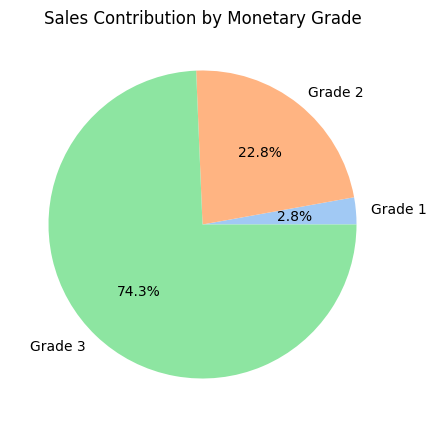

In [ ]:
# Monetary pie chart
groupby_monetary_grade = customer_df.groupby('monetary_grade').sum(numeric_only=True).reset_index()
groupby_monetary_grade['amount_total'].plot(
    kind='pie',
    autopct='%.1f%%',
    labels=[f'Grade {x}' for x in grade_labels],
    title='Sales Contribution by Monetary Grade',
    ylabel='',
    colors=colors
)

## 3.2. Classify RFM Customer Segments by Weighted Sums

In [ ]:
# Apply weighted sums

weight = {}
weight['recency'] = 1 / 3
weight['frequency'] = 1 / 3
weight['monetary'] = 1 / 3

customer_df['rfm_score'] = (
    weight['recency'] * customer_df['recency_grade'].astype('int')
    + weight['frequency'] * customer_df['frequency_grade'].astype('int')
    + weight['monetary'] * customer_df['monetary_grade'].astype('int')
)

In [ ]:
# Categorise
def rfm_segment_bins(x):
    if x < 5 / 3:
        return 1
    elif x <= 7 / 3:
        return 2
    else:
        return 3

customer_df['rfm_segment'] = customer_df['rfm_score'].apply(rfm_segment_bins)

customer_df['rfm_segment'].value_counts()

,count
rfm_segment,
1,926
2,811
3,468


<Axes: title={'center': 'Sales Contribution by RFM Customer Segment'}>

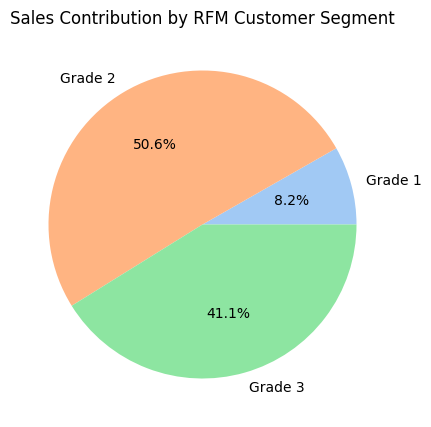

In [ ]:
# Pie chart by RFM segment
groupby_rfm_segment = customer_df.groupby('rfm_segment').sum(numeric_only=True).reset_index()
groupby_rfm_segment['amount_total'].plot(
    kind='pie',
    autopct='%.1f%%',
    labels=[f'Grade {x}' for x in grade_labels],
    title='Sales Contribution by RFM Customer Segment',
    ylabel='',
    colors=colors
)

In [ ]:
# Reset weights
weight['recency'] = 0.2
weight['frequency'] = 0.4
weight['monetary'] = 0.4

# Calculate weighted RFM score
customer_df['rfm_score'] = (
    weight['recency'] * customer_df['recency_grade'].astype('int')
    + weight['frequency'] * customer_df['frequency_grade'].astype('int')
    + weight['monetary'] * customer_df['monetary_grade'].astype('int')
)

# Segment customers into groups based on RFM score
customer_df['rfm_segment'] = customer_df['rfm_score'].apply(rfm_segment_bins)

customer_df['rfm_segment'].value_counts()

,count
rfm_segment,
1,802
3,792
2,611


<Axes: title={'center': 'Sales Contribution by RFM Customer Segment'}>

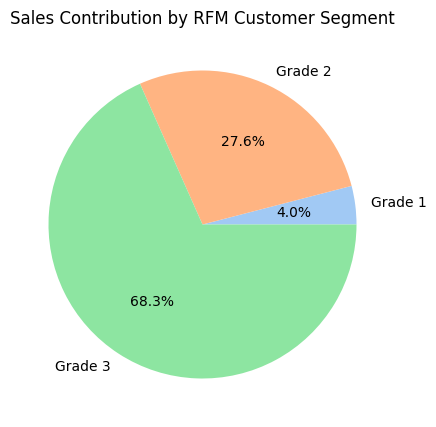

In [ ]:
# Final pie chart
groupby_rfm_segment = customer_df.groupby('rfm_segment').sum(numeric_only=True).reset_index()
groupby_rfm_segment['amount_total'].plot(
    kind='pie',
    autopct='%.1f%%',
    labels=[f'Grade {x}' for x in grade_labels],
    title='Sales Contribution by RFM Customer Segment',
    ylabel='',
    colors=colors
)

# 4. Analysis of segment characteristics and consumption behaviour

## 4.1. Identify age group distribution by segment

In [ ]:
# Grouping
groupby_rfm_segment_age_group = customer_df.groupby(['rfm_segment', 'age_group']).size().reset_index()
groupby_rfm_segment_age_group = groupby_rfm_segment_age_group.rename(columns={0: 'num_customers'})

/tmp/ipython-input-434761714.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupby_rfm_segment_age_group = customer_df.groupby(['rfm_segment', 'age_group']).size().reset_index()


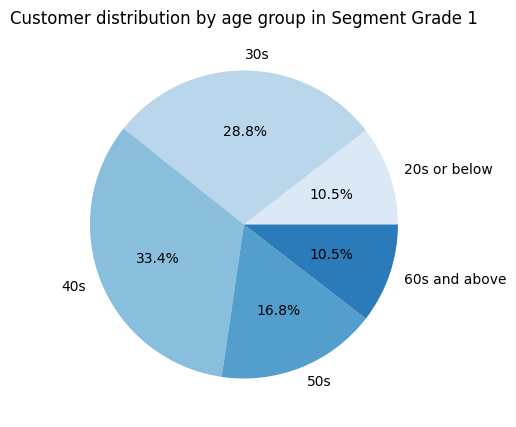

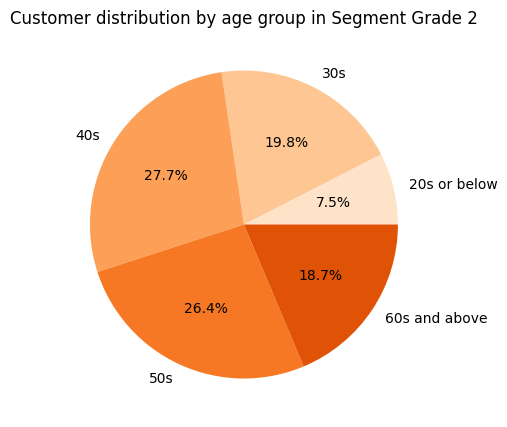

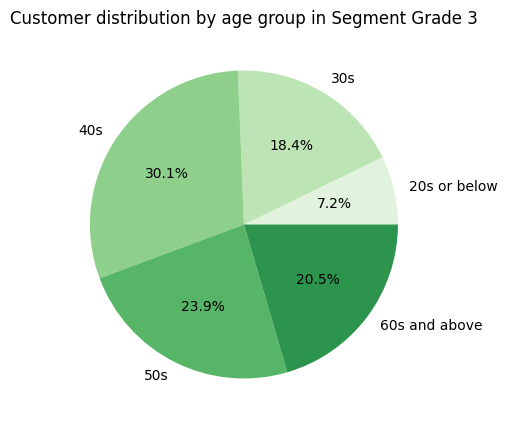

In [ ]:


# Pie chart
grade_palettes = {
    1: sns.color_palette("Blues", 6),
    2: sns.color_palette("Oranges", 6),
    3: sns.color_palette("Greens", 6),
}

for i_segment in range(1, num_grades + 1):
    age_group_dist = groupby_rfm_segment_age_group[
        groupby_rfm_segment_age_group['rfm_segment'] == i_segment
    ]

    colors = grade_palettes[i_segment][:len(age_group_dist)]

    age_group_dist['num_customers'].plot(
        kind='pie',
        autopct='%.1f%%',
        labels=age_group_dist['age_group'].unique(),
        title=f'Customer distribution by age group in Segment Grade {i_segment}',
        ylabel='',
        colors=colors
    )
    plt.show()

## 4.2. Identify family composition distribution by segment

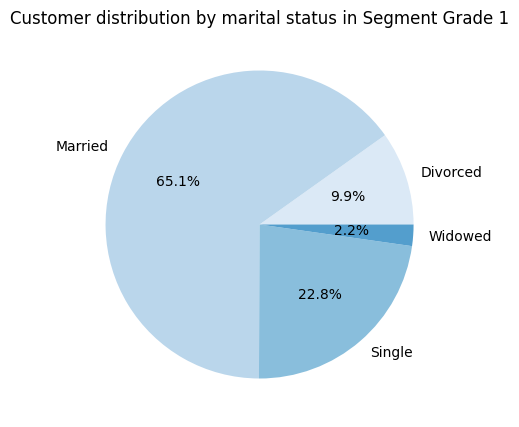

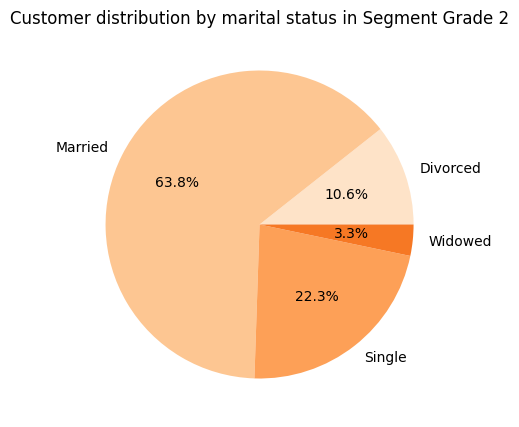

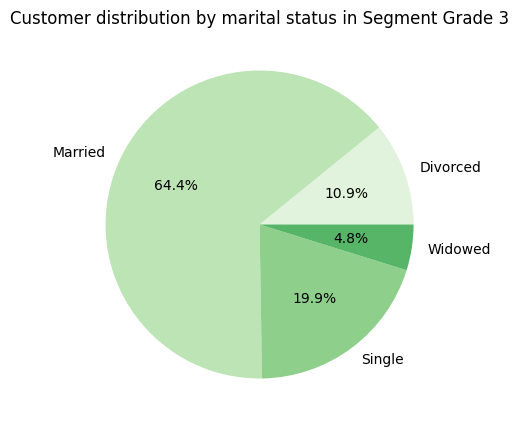

In [ ]:
# Marriage status

# Grouping
groupby_rfm_segment_marital = customer_df.groupby(['rfm_segment', 'marital_status']).size().reset_index()
groupby_rfm_segment_marital = groupby_rfm_segment_marital.rename(columns={0: 'num_customers'})

# Pie chart
grade_palettes = {
    1: sns.color_palette("Blues", 6),
    2: sns.color_palette("Oranges", 6),
    3: sns.color_palette("Greens", 6),
}

for i_segment in range(1, num_grades + 1):
    marital_status_dist = groupby_rfm_segment_marital[
        groupby_rfm_segment_marital['rfm_segment'] == i_segment
    ]
    colors = grade_palettes[i_segment][:len(marital_status_dist)]
    marital_status_dist['num_customers'].plot(
        kind='pie',
        autopct='%.1f%%',
        labels=marital_status_dist['marital_status'].unique(),
        title=f'Customer distribution by marital status in Segment Grade {i_segment}',
        ylabel='',
        colors=colors
    )
    plt.show()


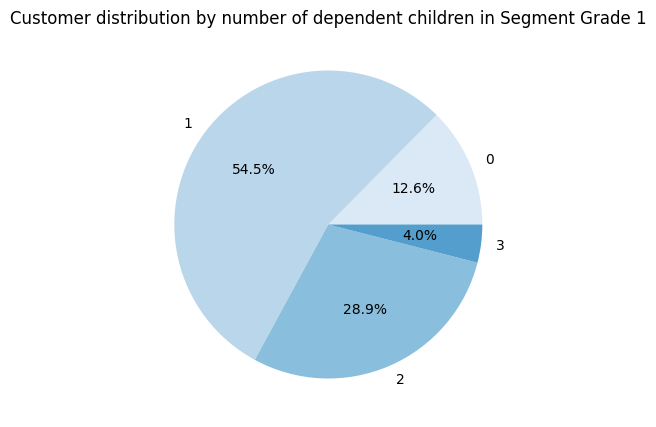

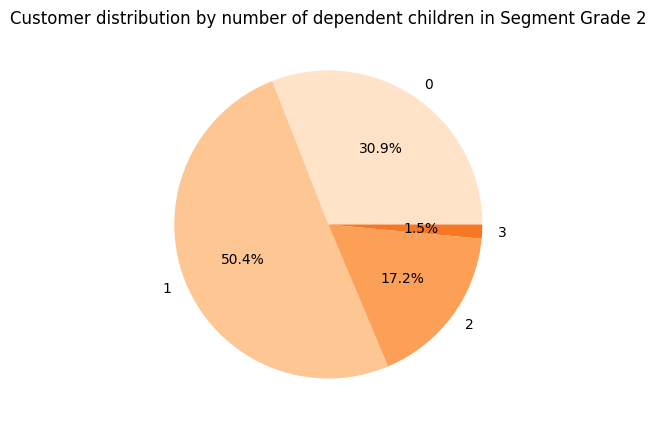

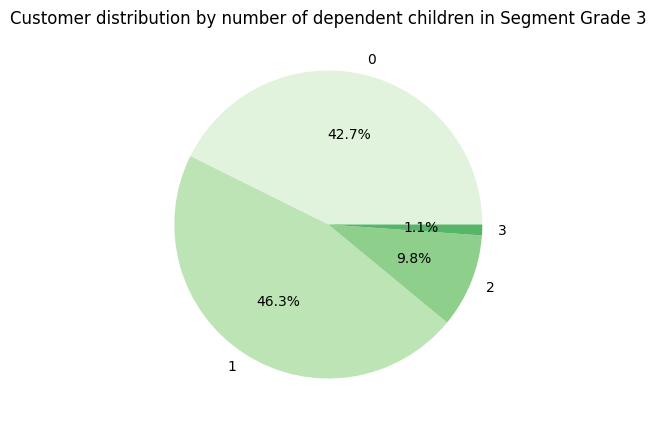

In [ ]:
# Children status

# Grouping
groupby_rfm_segment_children = customer_df.groupby(['rfm_segment', 'children']).size().reset_index()
groupby_rfm_segment_children = groupby_rfm_segment_children.rename(columns={0: 'num_customers'})

# Pie chart
grade_palettes = {
    1: sns.color_palette("Blues", 6),
    2: sns.color_palette("Oranges", 6),
    3: sns.color_palette("Greens", 6),
}

for i_segment in range(1, num_grades + 1):
    children_dist = groupby_rfm_segment_children[
        groupby_rfm_segment_children['rfm_segment'] == i_segment
    ]
    colors = grade_palettes[i_segment][:len(children_dist)]
    children_dist['num_customers'].plot(
        kind='pie',
        autopct='%.1f%%',
        labels=[f'{i}' for i in children_dist['children'].unique()],
        title=f'Customer distribution by number of dependent children in Segment Grade {i_segment}',
        ylabel='',
        colors=colors
    )
    plt.show()

## 4.3. Analyse sales contribution by product category within each segment

In [ ]:
# Grouping
groupby_rfm_segment = customer_df.groupby('rfm_segment').sum(numeric_only=True).reset_index()

selected_columns = [
    col
    for col in groupby_rfm_segment.columns
    if col.startswith('amount_') and col != 'amount_total'
]
selected_columns.append('rfm_segment')
selected_columns

['amount_alcohol',
 'amount_fruit',
 'amount_meat',
 'amount_fish',
 'amount_snack',
 'amount_general',
 'rfm_segment']

In [ ]:
# Indexing
amount_sum_per_product = groupby_rfm_segment[selected_columns]
amount_sum_per_product = amount_sum_per_product.set_index('rfm_segment')
amount_sum_per_product

,amount_alcohol,amount_fruit,amount_meat,amount_fish,amount_snack,amount_general
rfm_segment,,,,,,
1,26176800,4089800,16556800,6091800,4165200,13079300
2,231695100,22575800,133016000,31023200,22217000,39907400
3,619749000,49019100,324294100,71113900,51381200,73303100


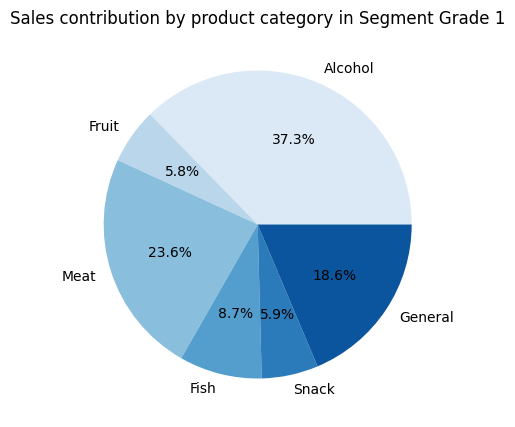

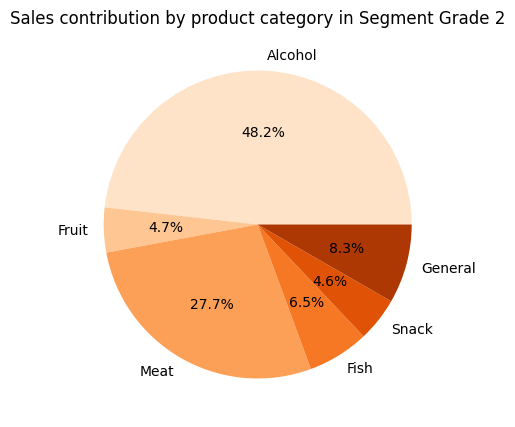

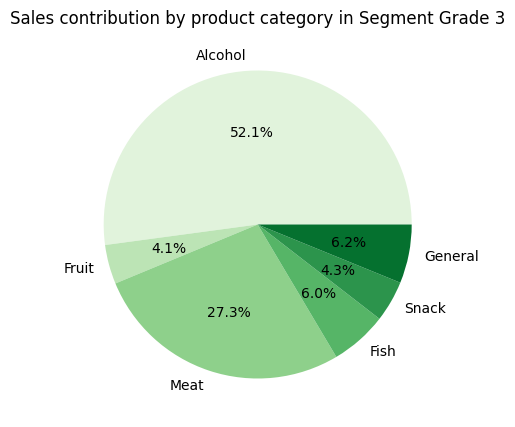

In [ ]:
# Pie chart
grade_palettes = {
    1: sns.color_palette("Blues", 6),
    2: sns.color_palette("Oranges", 6),
    3: sns.color_palette("Greens", 6),
}

for i_segment in range(1, num_grades + 1):
    colors = grade_palettes[i_segment][:6]
    amount_sum_per_product.loc[i_segment].plot(
        kind='pie',
        autopct='%.1f%%',
        labels=['Alcohol', 'Fruit', 'Meat', 'Fish', 'Snack', 'General'],
        title=f'Sales contribution by product category in Segment Grade {i_segment}',
        ylabel='',
        colors=colors
    )
    plt.show()


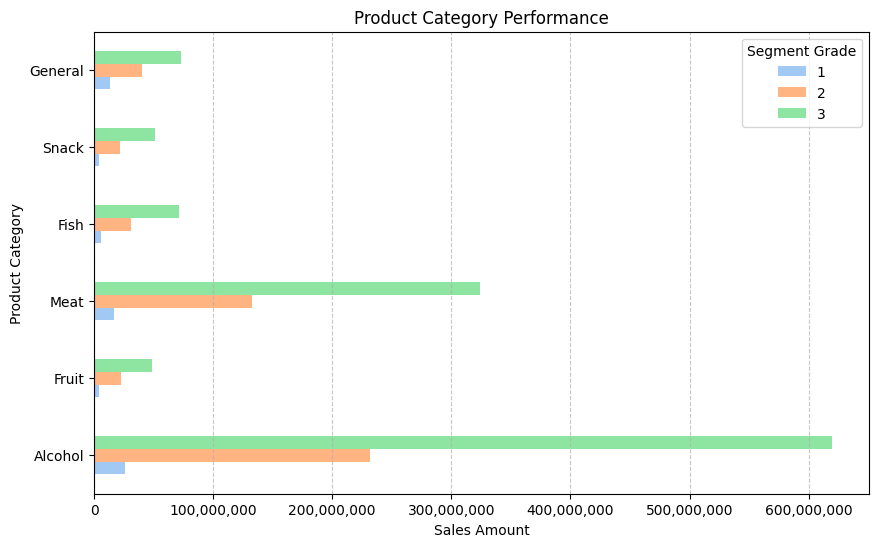

In [ ]:
# Bar chart
amount_sum_per_product_renamed = amount_sum_per_product.rename(
    columns=lambda x: x.replace('amount_', '').capitalize()
)

ax = amount_sum_per_product_renamed.T.plot(
    kind='barh',
    figsize=(10, 6),
    color=sns.color_palette("pastel", num_grades)
)

plt.title('Product Category Performance')
plt.xlabel('Sales Amount')
plt.ylabel('Product Category')
plt.legend(title='Segment Grade')

ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()


## 4.4. Measure promotion participation rate by segment

In [ ]:
# Grouping
groupby_rfm_segment = customer_df.groupby(['rfm_segment']).mean(numeric_only=True).reset_index()

selected_columns = [f'promotion_{i}' for i in range(1, 7)]
selected_columns.append('rfm_segment')
selected_columns

['promotion_1',
 'promotion_2',
 'promotion_3',
 'promotion_4',
 'promotion_5',
 'promotion_6',
 'rfm_segment']

In [ ]:
# Indexing
avg_promotion = groupby_rfm_segment[selected_columns]
avg_promotion = avg_promotion.set_index('rfm_segment')
avg_promotion

,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6
rfm_segment,,,,,,
1,0.000000,0.002494,0.071072,0.006234,0.001247,0.074813
2,0.050736,0.009820,0.072013,0.078560,0.060556,0.127660
3,0.140152,0.027778,0.078283,0.140152,0.155303,0.246212


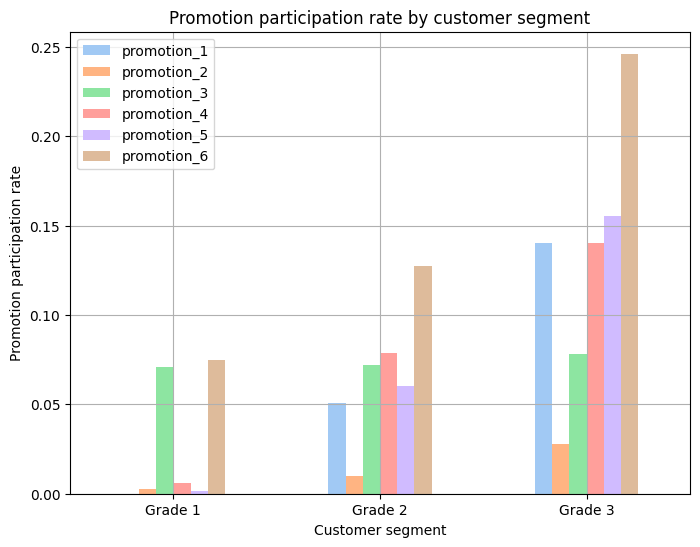

In [ ]:
# Bar chart
avg_promotion.index = range(1, len(avg_promotion) + 1)
avg_promotion.index = [f'Grade {i}' for i in avg_promotion.index]
colors = sns.color_palette("pastel", 6)

ax = avg_promotion.plot(
    kind='bar',
    color=colors,
    figsize=(8, 6)
)
plt.title('Promotion participation rate by customer segment')
plt.xlabel('Customer segment')
plt.ylabel('Promotion participation rate')
plt.grid()
plt.xticks(rotation=0)

plt.show()

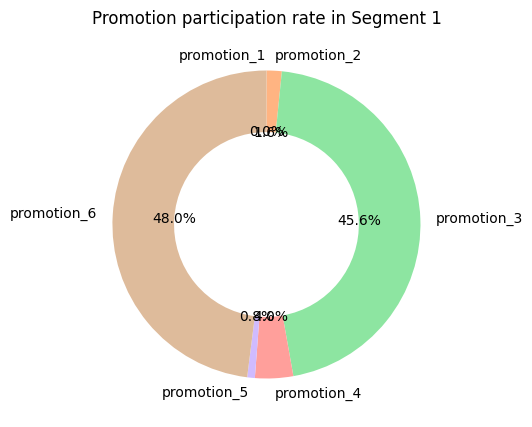

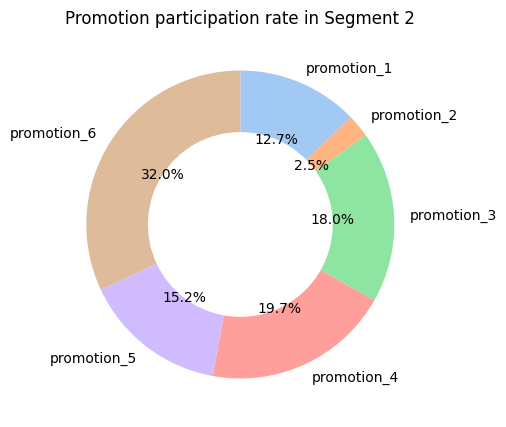

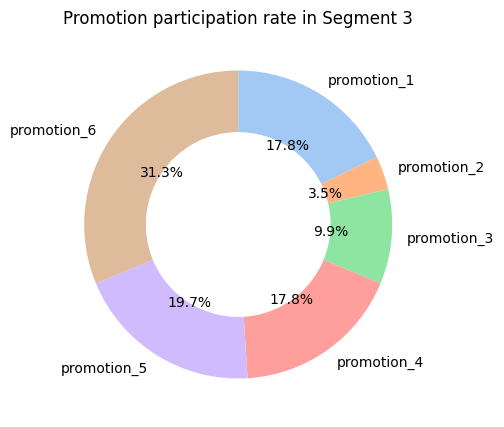

In [ ]:
# Donut charts for each segment
for seg in avg_promotion.index:
    values = avg_promotion.loc[seg]
    plt.pie(
        values,
        labels=values.index,
        autopct='%.1f%%',
        startangle=90,
        counterclock=False,
        colors=sns.color_palette("pastel", len(values)),
        wedgeprops=dict(width=0.4)  # 도넛 효과
    )
    plt.title(f'Promotion participation rate in Segment {seg}')
    plt.show()
